In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#For ML Models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

#For Data splitting
from sklearn.model_selection import train_test_split

#For error measurement
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
from sklearn.datasets import load_boston
data, target = load_boston(return_X_y=True)
features = load_boston()['feature_names']
data = pd.DataFrame(data, columns=features)
data['PRICE'] = target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


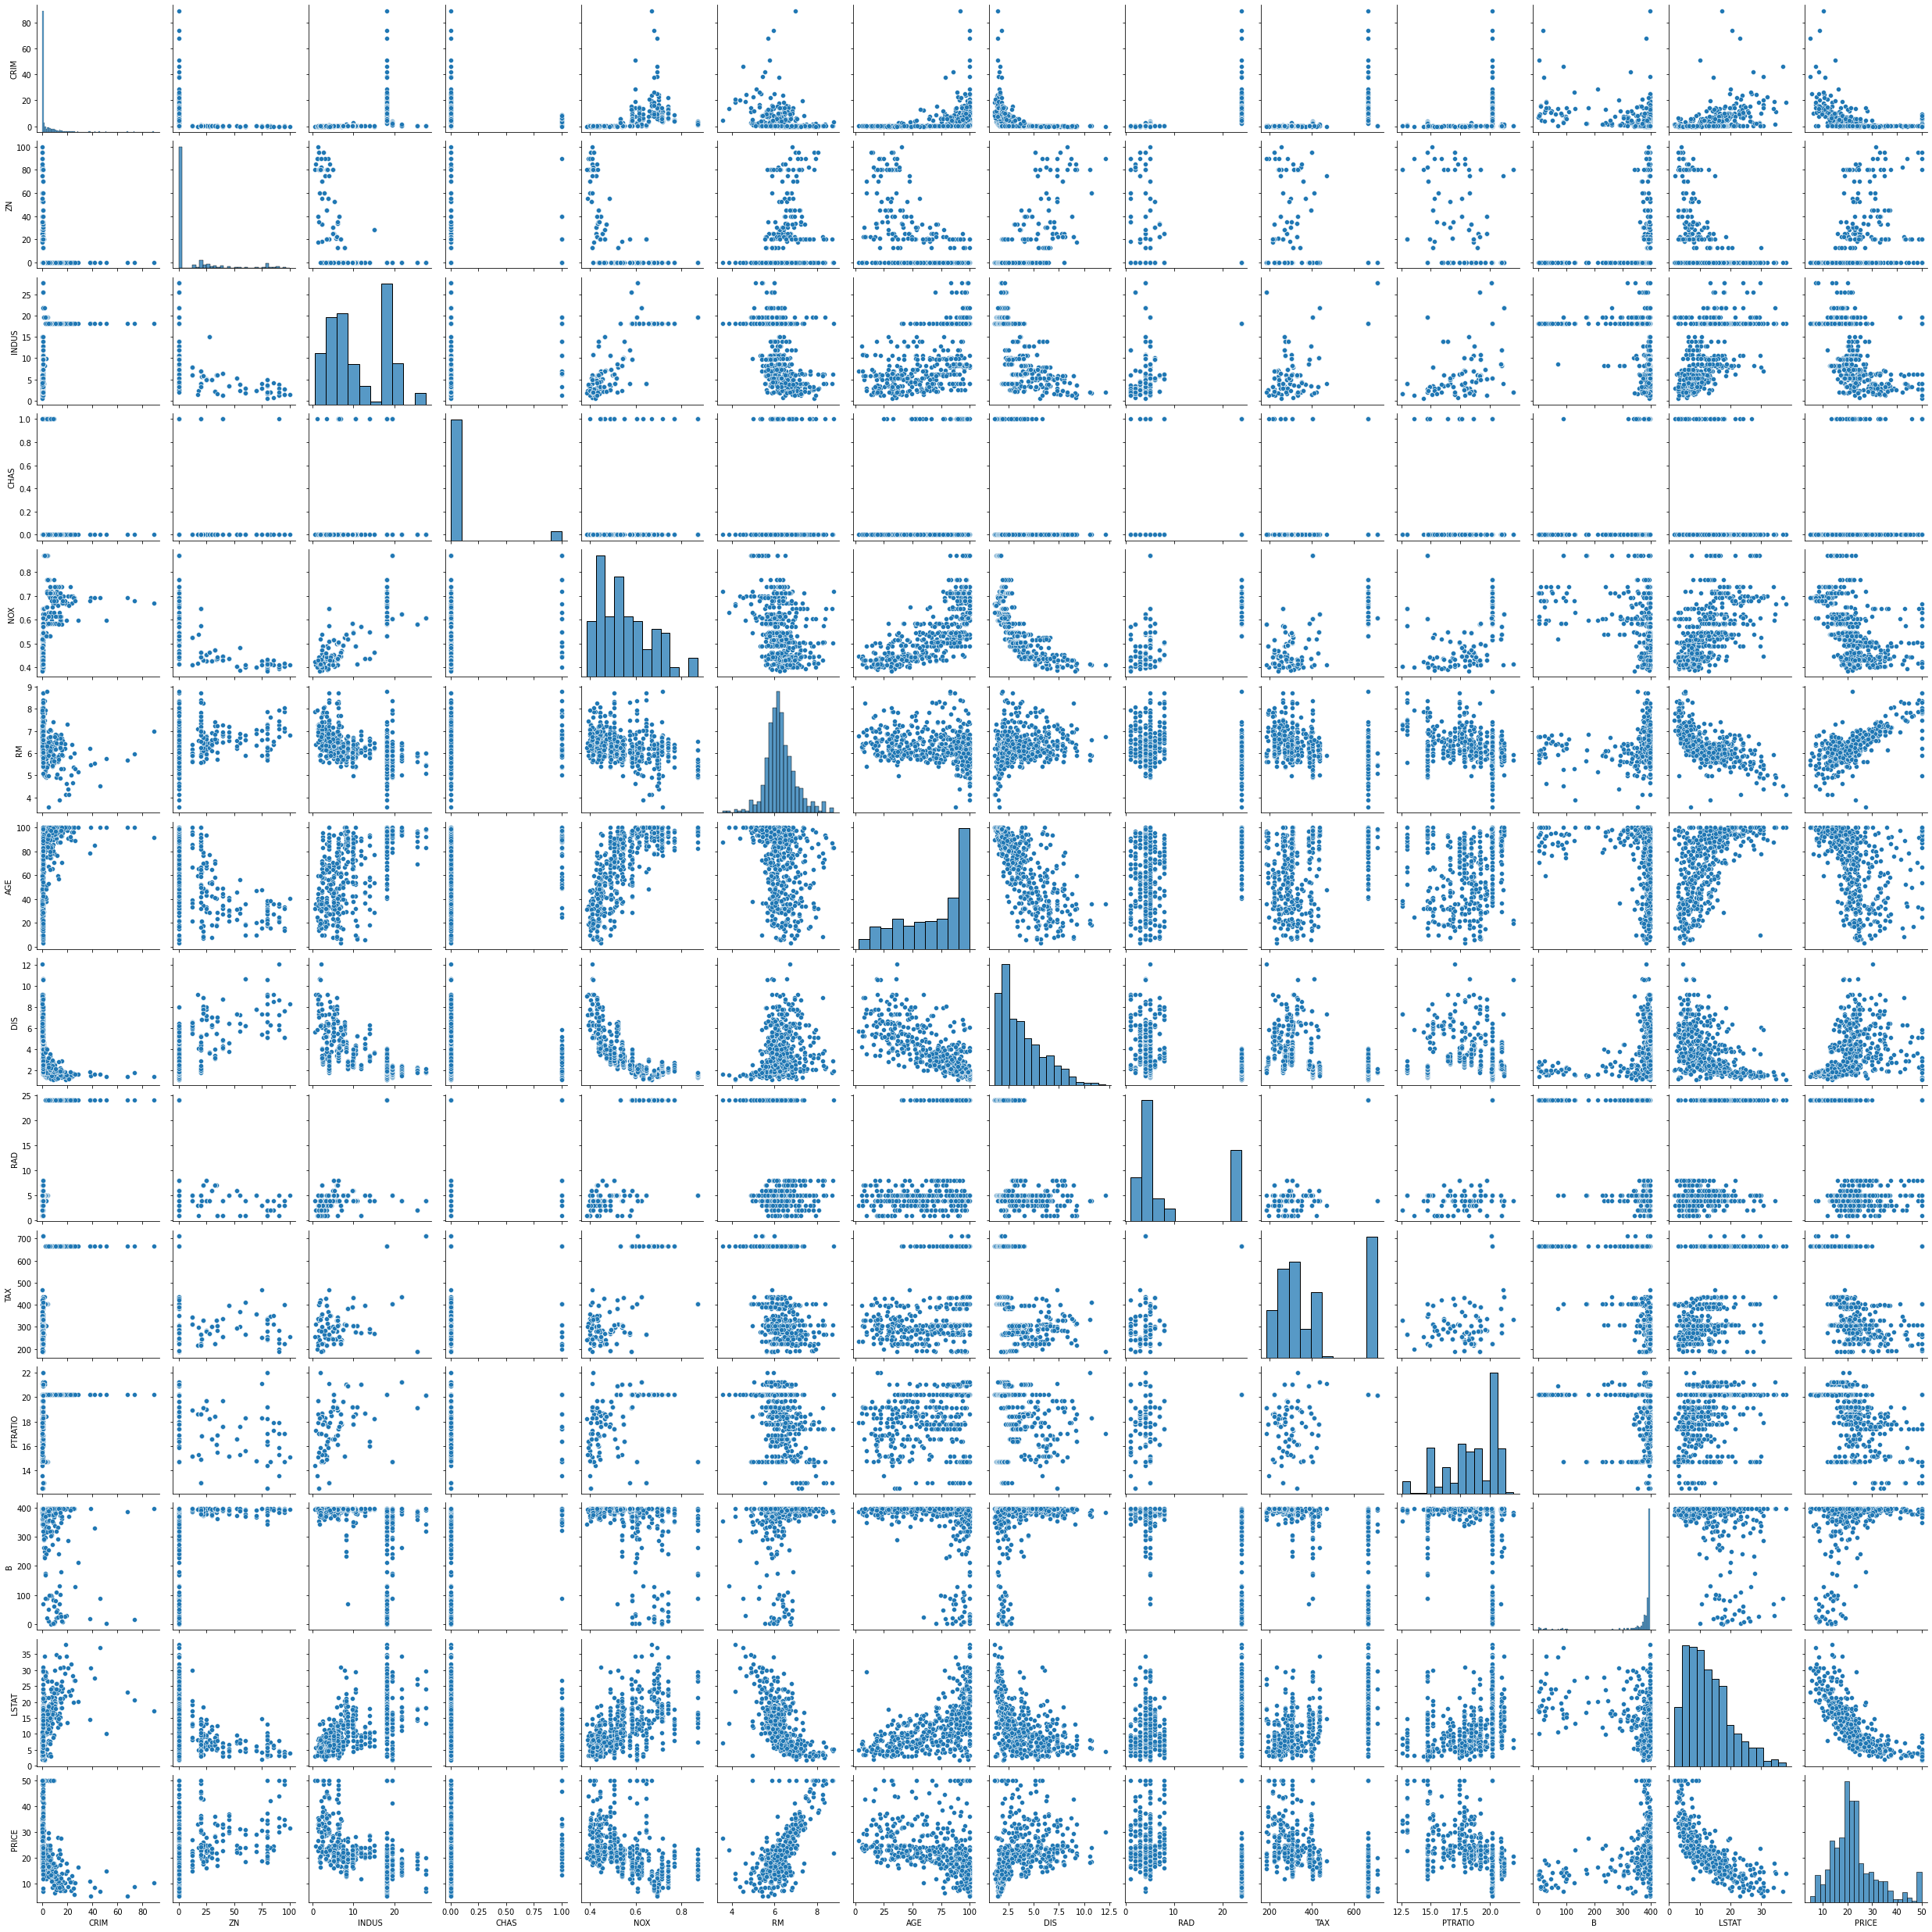

In [4]:
sns.pairplot(data)

**Useful features:**


1.   LSTAT
2.   RM
3.   DIS
4.   INDUS



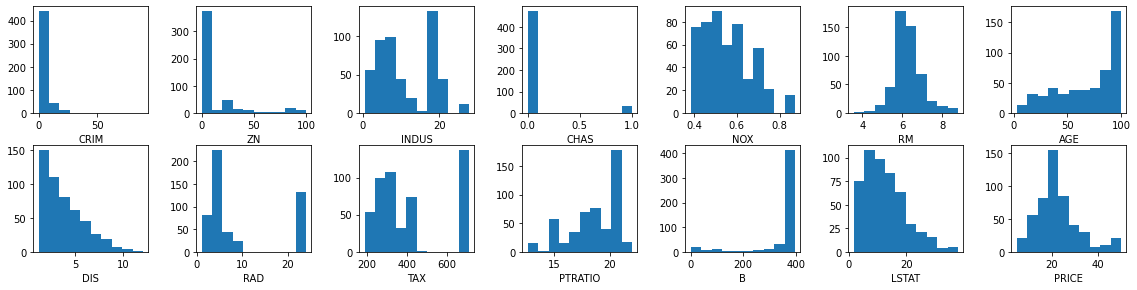

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(16,4))
plt.tight_layout()

cols = data.columns
index = 0
for i in range(2):
  for j in range(7):
    axs[i][j].hist(data[cols[index]])
    axs[i][j].set_xlabel(cols[index])
    index += 1


USEFUL FEATURES:


1.   DIS
2.   AGE
3.   RM(IMPORTANT FEATURE)
4.   LSTAT(MOST IMP)
5.   NOX
6.   PTRATIO

<AxesSubplot:>

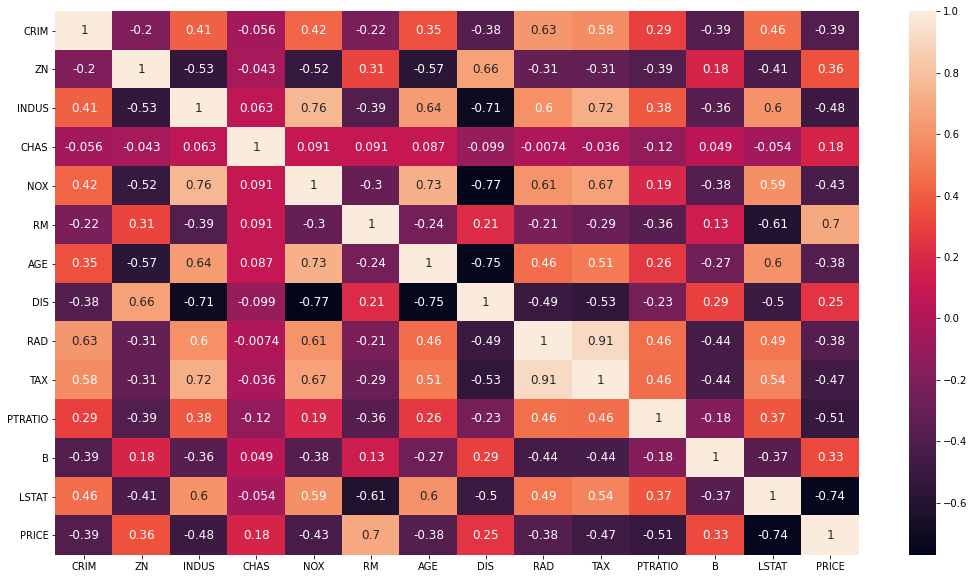

In [6]:
fig, axs = plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(), annot=True, annot_kws={'size':12})

**Features with corr > .5**


1.   LSTAT
2.   PTRATIO
3.   RM



In [7]:
selectedFeatures = data[['LSTAT', 'PTRATIO', 'RM']]

In [8]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(selectedFeatures, target, test_size=0.2)
X_train.head()

,LSTAT,PTRATIO,RM
228,3.92,17.4,7.686
302,8.67,16.1,6.495
213,9.38,18.6,6.375
76,11.97,18.7,6.279
291,3.56,19.2,7.148


In [9]:
#LinearModelSection
#Train the model using multiple features
linModel = LinearRegression()
linModel.fit(X_train, y_train)

LinearRegression()

**Testing Data with this Linear Model**

In [10]:
#Predict Data(Training Data)
predictedTrainVals = linModel.predict(X_train)

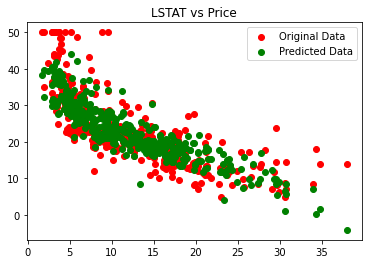

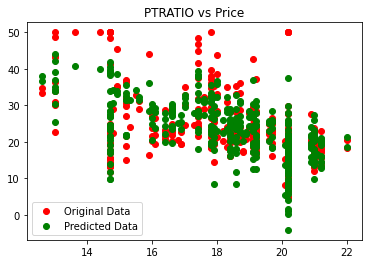

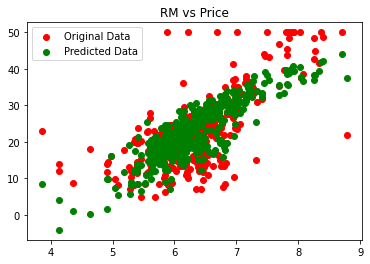

In [11]:
for i in range(len(selectedFeatures.columns)):
  plt.title(selectedFeatures.columns[i] + " vs " + "Price")
  plt.scatter(X_train[selectedFeatures.columns[i]], y_train, color='red', label='Original Data')
  plt.scatter(X_train[selectedFeatures.columns[i]], predictedTrainVals, color='green', label="Predicted Data")
  #plt.plot(X_test[selectedFeatures.columns[i]], predictedTestVals, color='aqua')
  plt.legend()
  plt.show()

Predicted datas seems to fit with real data.

In [12]:
#Measuring Accuracy
mse = mean_squared_error(y_train, predictedTrainVals)
r2 = r2_score(y_train, predictedTrainVals)
print("MSE: ", mse, "\nR2 Score: ", r2)

MSE:  26.990649473518165 
R2 Score:  0.6850647152246921


**Testing Data with this linear Model(MultiVariate Data)**

MSE:  28.237404039700195 
R2 Score:  0.6407813229085197


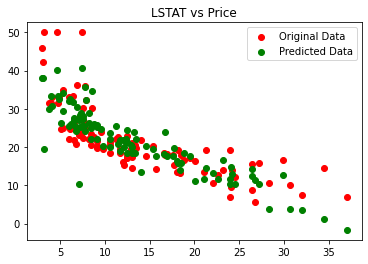

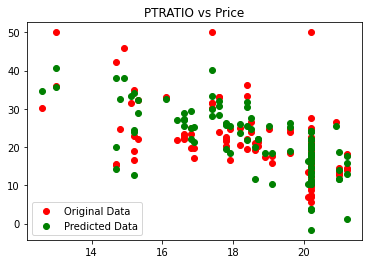

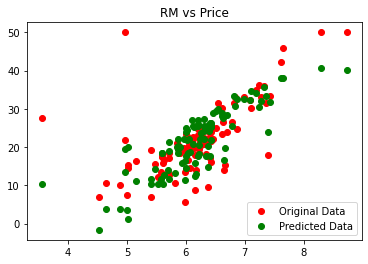

In [13]:
#Predicting Testing Data and calculating mse
predictedTestVals = linModel.predict(X_test)

#Error Calculation
mse = mean_squared_error(y_test, predictedTestVals)
r2 = r2_score(y_test, predictedTestVals)
print("MSE: ", mse, "\nR2 Score: ", r2)

for i in range(len(selectedFeatures.columns)):
  plt.title(selectedFeatures.columns[i] + " vs " + "Price")
  plt.scatter(X_test[selectedFeatures.columns[i]], y_test, color='red', label='Original Data')
  plt.scatter(X_test[selectedFeatures.columns[i]], predictedTestVals, color='green', label="Predicted Data")
  plt.legend()
  plt.show()

No overfitting at least. Polynomial can do better, I think.

**Linear Regression using one highly correlated feature(UnivariateData)**

In [14]:
#Using single independent variable of highest correlation
#Training model
linModel1 = LinearRegression()
x = X_train['LSTAT'].values.reshape(-1,1)
y = y_train
linModel1.fit(x, y)

LinearRegression()

MSE(Train):  39.5669467848105 
R2 Score(Train):  0.1423708195846709
MSE(Test):  34.43040197808088 
R2 Score(Test):  0.42188810901247076


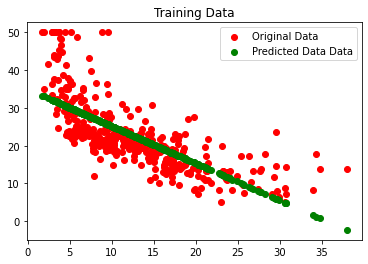

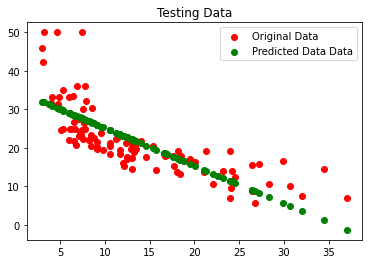

In [15]:
#Measuring Errors for training data
predictedTrainVals1 = linModel1.predict(x)
mse = mean_squared_error(predictedTrainVals1, y_train)
r2 = r2_score(predictedTrainVals1, y_train)
print("MSE(Train): ", mse, "\nR2 Score(Train): ", r2)

#Calculating Error For Testing Data
test_x = X_test['LSTAT'].values.reshape(-1,1)
predictedTestVals = linModel1.predict(test_x)

mseTest = mean_squared_error(predictedTestVals, y_test)
r2Test = r2_score(predictedTestVals, y_test)
print("MSE(Test): ", mseTest, "\nR2 Score(Test): ", r2Test)

#Now let's visualize
plt.title('Training Data')
plt.scatter(x, y, color='red', label='Original Data')
plt.scatter(x, predictedTrainVals1, color='green', label='Predicted Data Data')
plt.legend()
plt.show()

plt.title('Testing Data')
plt.scatter(test_x, y_test, color='red', label='Original Data')
plt.scatter(test_x, predictedTestVals, color='green', label='Predicted Data Data')
plt.legend()
plt.show()


**Polynomial Linear Regression**

Lets do a polynomial linear regression with this single variate data: LSTAT

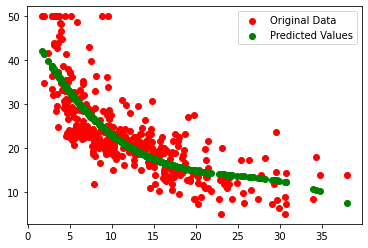

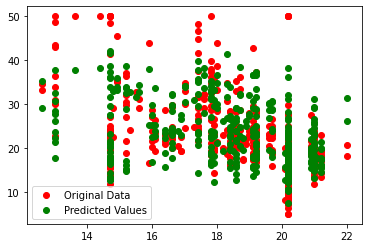

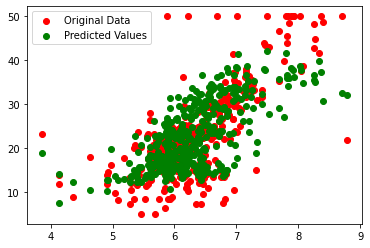

MSE:  30.22370263223396 
R2 Score:  0.6473404463725152


In [16]:
#Train Poly model
polyModel = PolynomialFeatures(degree=3)
fittedX = polyModel.fit_transform(x)

#Tran this poly linear model
linModel = LinearRegression()
linModel.fit(fittedX, y_train)

#Predict
predictedValsPoly = linModel.predict(fittedX)

for i in range(len(X_train.columns)):
    #Visualize the data
    plt.scatter(X_train[X_train.columns[i]], y_train, color='red', label='Original Data')
    plt.scatter(X_train[X_train.columns[i]], predictedValsPoly, color = 'green', label = "Predicted Values")
    plt.legend()
    plt.show()

#Calculate Error
mse = mean_squared_error(y_train, predictedValsPoly)
r2 = r2_score(y_train, predictedValsPoly)

print("MSE: ", mse, "\nR2 Score: ", r2)

**Polynomial Linear Regression with Multivariate Data**

**Training Data**

MSE(Train):  17.937481688982494 
R2(Train):  0.7906998899965626


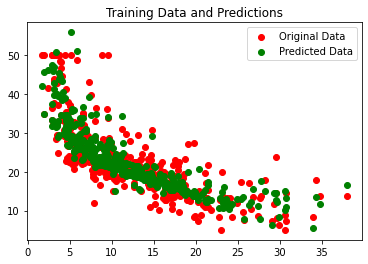

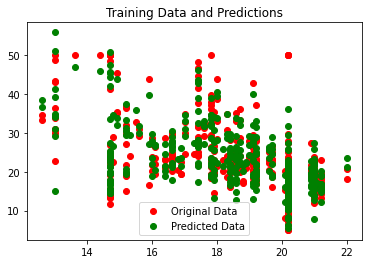

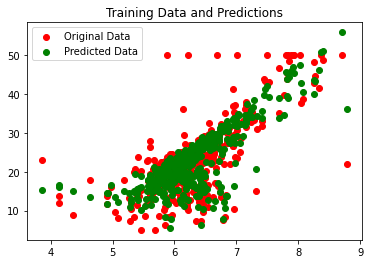

In [17]:
#Training Data
polyModel1 = PolynomialFeatures(degree=2)

fittedX = polyModel1.fit_transform(X_train)

linModel.fit(fittedX, y_train)
predictedPolyData = linModel.predict(fittedX)

mse = mean_squared_error(y_train, predictedPolyData)
r2 = r2_score(y_train, predictedPolyData)

print('MSE(Train): ', mse, "\nR2(Train): ", r2)

#plotting Data
for i in range(len(X_train.columns)):
    plt.title("Training Data and Predictions")
    plt.scatter(X_train[X_train.columns[i]], y_train, color='red', label='Original Data')
    plt.scatter(X_train[X_train.columns[i]], predictedPolyData, color='green', label='Predicted Data')
    plt.legend()
    plt.show()

**Testing Data**

MSE(Test):  18.394966333800262 
R2(Test):  0.7659906887233744


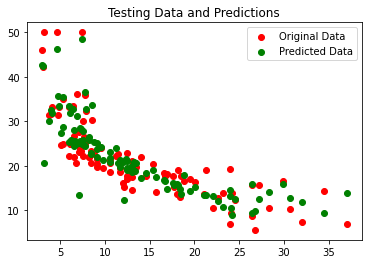

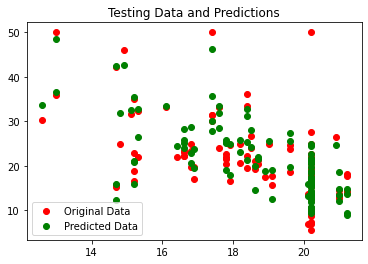

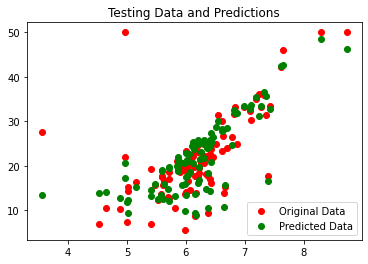

In [18]:
predictedPolyTesting = linModel.predict(polyModel1.fit_transform(X_test))
mse = mean_squared_error(y_test, predictedPolyTesting)
r2 = r2_score(y_test, predictedPolyTesting)

print('MSE(Test): ', mse, "\nR2(Test): ", r2)

#plotting Data
for i in range(len(X_test.columns)):
    plt.title("Testing Data and Predictions")
    plt.scatter(X_test[X_test.columns[i]], y_test, color='red', label='Original Data')
    plt.scatter(X_test[X_test.columns[i]], predictedPolyTesting, color='green', label='Predicted Data')
    plt.legend()
    plt.show()

Variance never lets us go, does it? 0.75 score for testing data and 0.8+ for training.

**Decision Tree Regressor**

In [19]:
#Although the data seems linear and im sure decision tree is not for this
#But still trying
#So, training a decision tree model
decisionModel = DecisionTreeRegressor(max_depth=4)
decisionModel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

MSE(Train):  13.706989228966695 
R2 Train:  0.809612508339005

MSE(Test):  16.002797125714974 
R2 Train:  0.7536556276338776


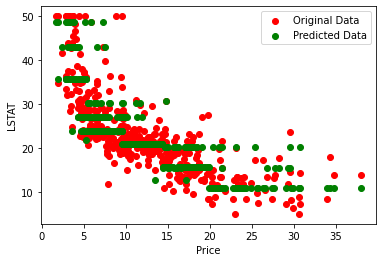

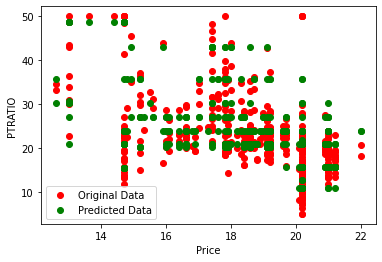

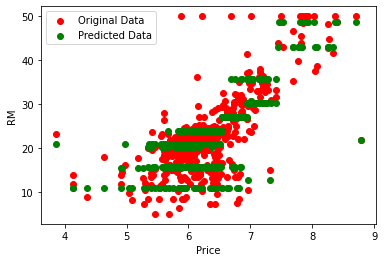

In [20]:
predictedTreeValues = decisionModel.predict(X_train)

#Calculate error for this model
mseTrain = mean_squared_error(predictedTreeValues, y_train)
r2Train = r2_score(predictedTreeValues, y_train)
#This seems the lowest but im afraid it's overfitted data
#So lets check it in test values
mseTest = mean_squared_error(decisionModel.predict(X_test), y_test)
r2Test = r2_score(decisionModel.predict(X_test), y_test)

print('MSE(Train): ', mseTrain, "\nR2 Train: ", r2Train)
print('\nMSE(Test): ', mseTest, "\nR2 Train: ", r2Test)
#Absolute Disaster


#Visualize the model's performance
for i in range(len(X_train.columns)):
    plt.xlabel("Price")
    plt.ylabel(X_train.columns[i])
    plt.scatter(X_train[X_train.columns[i]], y_train, color='red', label='Original Data')
    plt.scatter(X_train[X_train.columns[i]], predictedTreeValues, color='green', label='Predicted Data')
    plt.legend()
    plt.show()

**Decision Tree with all features**

In [21]:
#I think this tree model could do better if I used all features
#So training another tree model
treeModel2 = DecisionTreeRegressor(max_depth=4)
dataNew = data.drop(["PRICE"], axis=1)
#Lets split data to figureout over or underfitting later
X_train1, X_test1, y_train1, y_test1 = train_test_split(dataNew, target, test_size=0.2)

#Train
treeModel2.fit(X_train1, y_train1)

#Predict Training Data
predictedTreeVals2 = treeModel2.predict(X_train1)

#Predict Testing Data
predictedTreeValsTest = treeModel2.predict(X_test1)

#Calculate Error
mseTreeTrain = mean_squared_error(predictedTreeVals2, y_train1)
r2TreeTrain = r2_score(predictedTreeVals2, y_train1)

mseTreeTest = mean_squared_error(predictedTreeValsTest, y_test1)
r2TreeTest = r2_score(predictedTreeValsTest, y_test1)

print('MSE(Train): ', mseTreeTrain, "\nR2 Train: ", r2TreeTrain)
print('MSE(Test): ', mseTreeTest, "\nR2 Test: ", r2TreeTest)
#Hmm error is certainly lower, lets visualize the data

MSE(Train):  9.488350157459166 
R2 Train:  0.8631722901762444
MSE(Test):  21.198201420714895 
R2 Test:  0.766000951856848


In [26]:
from sklearn.ensemble import BaggingRegressor

baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth = 4), n_estimators = 20)
baggingModel.fit(X_train, y_train)

#Training Data
mseBagging = mean_squared_error(y_train, baggingModel.predict(X_train))
r2Bagging = r2_score(y_train, baggingModel.predict(X_train))

#Testing data
mseBaggingTest = mean_squared_error(y_test, baggingModel.predict(X_test))
r2BaggingTest = r2_score(y_test, baggingModel.predict(X_test))

print("MSE(Train): ", mseBagging, "\nR2(Train): ", r2Bagging, "\n\nMSE(Test): ", mseBaggingTest, "\nR2(Test): ", r2BaggingTest)

MSE(Train):  12.38828422917992 
R2(Train):  0.8554496502419405 

MSE(Test):  11.40675833548662 
R2(Test):  0.8548903208873295


Here, accuracy is quite good, relatively and variance is not high. So, model is neither or or underfitting.

In [33]:
#Lets try boostong the model
from sklearn.ensemble import AdaBoostRegressor
boostingModel = AdaBoostRegressor(learning_rate=0.01, n_estimators=10)
boostingModel.fit(X_train, y_train)

mseBoost = mean_squared_error(y_train, boostingModel.predict(X_train))
mseBoostTest = mean_squared_error(y_test, boostingModel.predict(X_test))

r2Boost = r2_score(y_train, boostingModel.predict(X_train))
r2BoostTest = r2_score(y_test, boostingModel.predict(X_test))

print("MSE(Train): ", mseBoost, "\nR2(Train): ", r2Boost, "\n\nMSE(Test): ", mseBoostTest, "\nR2(Test): ", r2BoostTest)

MSE(Train):  16.635272794964333 
R2(Train):  0.8058944680031767 

MSE(Test):  14.765696849754903 
R2(Test):  0.8121599959668562


By far, my bagging regressor turned out to be the highly accurate model, relatively speaking. So, baggingModel is the model to use in this analysis. But the bad thing is, I have to provide multiple features during prediction as well. One value cannot predict the accurately, unless we use older linear models.